<a href="https://colab.research.google.com/github/s-im-ran/Projects/blob/main/Fake_News_Classifier%20_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FAKE NEWS CLASSIFICATION USING NAIVE BAYES CLASSIFICATION


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fake=pd.read_csv("/content/drive/MyDrive/Fake.csv")
fraction = 0.2
fake_pd= fake.sample(frac=fraction, random_state=42)

In [ ]:
true=pd.read_csv("/content/drive/MyDrive/True.csv")
fraction = 0.2
true_pd = true.sample(frac=fraction, random_state=42)

In [ ]:
len(fake_pd)

4696

In [ ]:
len(true_pd)

4283

In [ ]:
fake_pd.head()

,title,text,subject,date
13474,ABOUT HILLARY’S COUGH: We Discovered The Secre...,,politics,"Jul 20, 2016"
11994,BREAKING: OBAMACARE REPEAL Clears First Hurdle...,The Senate voted 51-48 this afternoon to proce...,politics,"Jan 4, 2017"
19179,‘SLEEPY’ JUSTICE GINSBURG: Excites Crowd By Sa...,So much for the SCOTUS not being political Che...,left-news,"Feb 7, 2017"
501,WATCH: Kellyanne Conway Very Upset Hillary Cl...,White House counselor Kellyanne Conway crawled...,News,"August 24, 2017"
3492,"GOP Gives Trump The Middle Finger, Prepares T...",Donald Trump may have decided that Russia is g...,News,"December 9, 2016"


In [ ]:
true_pd.head()

,title,text,subject,date
18137,Europe rights watchdog says Turkey's emergency...,BRUSSELS (Reuters) - A leading European rights...,worldnews,"October 6, 2017"
3277,Exclusive: Trump targets illegal immigrants wh...,"(Reuters) - In September 2014, Gilberto Velasq...",politicsNews,"June 9, 2017"
2876,"At G20 summit, Trump pledges $639 million in a...",HAMBURG (Reuters) - U.S. President Donald Trum...,politicsNews,"July 8, 2017"
5160,Ex-Christie associates lose bid for new trial ...,NEW YORK (Reuters) - A federal judge rejected ...,politicsNews,"March 2, 2017"
10843,Young blacks more open to Bernie Sanders' Whit...,"ORANGEBURG, S.C. (Reuters) - If Democratic hop...",politicsNews,"February 12, 2016"


In [ ]:
X = pd.concat([fake_pd,true_pd],axis=0)
X.reset_index(drop=True,inplace=True)

print("Length of X after concatenation:", len(X))

Length of X after concatenation: 8979


In [ ]:
X.shape

(8979, 4)

In [ ]:
X=X.drop(['subject','title','date'],axis=1)

In [ ]:
X.head()

,text
0,
1,The Senate voted 51-48 this afternoon to proce...
2,So much for the SCOTUS not being political Che...
3,White House counselor Kellyanne Conway crawled...
4,Donald Trump may have decided that Russia is g...


In [ ]:
y=[1]*len(fake_pd)+[0]*len(true_pd)

In [ ]:
len(y)

8979

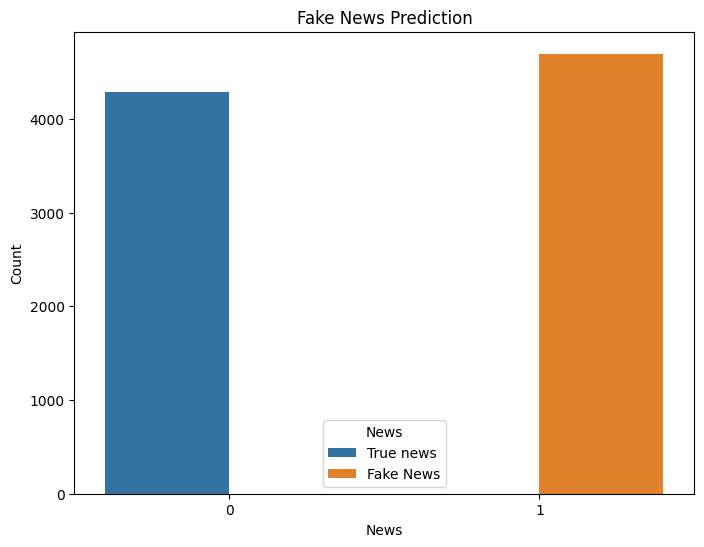

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=X,x=y,hue=y)

plt.xlabel("News")
plt.ylabel("Count")

plt.title("Fake News Prediction")
plt.legend(title='News',labels=['True news','Fake News'])


plt.show()


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in string.punctuation and word.lower() not in stopwords.words('english')]
    processed_text = ' '.join(processed_tokens)
    return processed_text


X['text'] = X['text'].apply(preprocess_text)


In [ ]:
X.head()

,text
0,
1,Senate voted 51-48 afternoon proceed resolutio...
2,much SCOTUS political Check comment equality w...
3,White House counselor Kellyanne Conway crawled...
4,Donald Trump may decided Russia going America ...


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
from collections import Counter
original_class_distribution = Counter(y)
training_class_distribution = Counter(y_train)
test_class_distribution = Counter(y_test)

print("Original Class Distribution:", original_class_distribution)
print("Training Class Distribution:", training_class_distribution)
print("Test Class Distribution:", test_class_distribution)


Original Class Distribution: Counter({1: 4696, 0: 4283})
Training Class Distribution: Counter({1: 3757, 0: 3426})
Test Class Distribution: Counter({1: 939, 0: 857})


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_train_v=cv.fit_transform(X_train['text'])
X_train_vectorized = pd.DataFrame(X_train_v.toarray(), columns=cv.get_feature_names_out())

X_test_v=cv.transform(X_test['text'])
X_test_vectorized= pd.DataFrame(X_test_v.toarray(), columns=cv.get_feature_names_out())



In [ ]:
print(X_train_vectorized.shape)
print(len(y_train))

(7183, 51827)
7183


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_vectorized,y_train )
y_pred = nb.predict(X_test_vectorized)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9510022271714922
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       857
           1       0.95      0.96      0.95       939

    accuracy                           0.95      1796
   macro avg       0.95      0.95      0.95      1796
weighted avg       0.95      0.95      0.95      1796

Confusion Matrix:
 [[811  46]
 [ 42 897]]


In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train_vectorized,y_train )
y_pred = nb.predict(X_test_vectorized)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.950445434298441
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       857
           1       0.96      0.94      0.95       939

    accuracy                           0.95      1796
   macro avg       0.95      0.95      0.95      1796
weighted avg       0.95      0.95      0.95      1796

Confusion Matrix:
 [[825  32]
 [ 57 882]]
